# SOLAR-NEUTRINO-VISIBLE-DECAYS

https://github.com/mhostert/solar-neutrino-visible-decays

## Import modules

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from scipy import interpolate
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from matplotlib.pyplot import *
from scipy.stats import chi2
import importlib
import vegas
import gvar as gv

from source import *
from source import flavour_transitions as osc

## Pick points to sample integrand

In [3]:
##########
# integration evaluations
rates.NEVALwarmup = 1e4
rates.NEVAL = 1e5

## Flux and Decay Parameters

The mixings will be used to rescale the number of events, so pick anything sensible

In [4]:
###########
# NUMU FLUX
fluxfile = "fluxes/b8spectrum.txt"
flux = fluxes.get_neutrino_flux(fluxfile)

###########
# DECAY MODEL PARAMETERS
params = model.decay_model_params(const.SCALAR)
params.gx		= 1.0
params.Ue4		= np.sqrt(0.01)
params.Umu4		= np.sqrt(0.01)
params.Utau4    = np.sqrt(0)
params.UD4		= np.sqrt(1.0-params.Ue4*params.Ue4-params.Umu4*params.Umu4)
params.m4		= 300e-9 # GeV
params.mBOSON  = 0.9*params.m4 # GeV

###########
# EXPERIMENTS
KAM = exps.kamland_data()
KAM21 = exps.kamland21_data()
BOR = exps.borexino_data()
SK = exps.superk_data()


# Compute rates for benchmark point at the three experiments

This can be an expensive computation, depending on the desired precision -- we care about tails.

In [5]:
UE4SQR, UMU4SQR, LK21 = stats.get_likelihood(KAM21, params, fluxfile, endpoint=18.31, NPOINTS =33)
UE4SQR, UMU4SQR, LK = stats.get_likelihood(KAM, params, fluxfile, endpoint=16.3, NPOINTS =33)
UE4SQR, UMU4SQR, LB = stats.get_likelihood(BOR, params, fluxfile, endpoint=16.3, NPOINTS =33)
UE4SQR, UMU4SQR, LS = stats.get_likelihood(SK, params, fluxfile, endpoint=16.3, NPOINTS =33)

Filling the bins in kamland21
1.2321386487235222 3
Filling the bins in kamland
5.14696624163787 6
Filling the bins in borexino
19.739876035592072 12
Filling the bins in SUPERK_IV
2.2760395325135008 2


### Plot resulting limits

Setup and plot preference regions from https://arxiv.org/abs/1911.01427 

In [40]:
################################################################
# PLOTTING THE LIMITS
################################################################
fsize=11
rc('text', usetex=True)
rcparams={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
				'figure.figsize':(1*3.7,1.4*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
matplotlib.rcParams['hatch.linewidth'] = 0.1  # previous pdf hatch linewidth
rcParams.update(rcparams)
axes_form  = [0.185,0.15,0.775,0.76]
fig = plt.figure()
ax = fig.add_axes(axes_form)

############
# GET THE FIT REGIONS FROM DENTLER ET AL
DentlerPath='digitized/Dentler_et_al/'

SB_COLOR = 'lightgrey'
MB_ue_b,MB_umu_b = np.genfromtxt(DentlerPath+'bottom_MiniBooNE_300.txt',unpack=True)
MB_ue_t,MB_umu_t = np.genfromtxt(DentlerPath+'top_MiniBooNE_300.txt',unpack=True)
MB_ue_f=np.logspace( np.log10(np.min([MB_ue_b])), np.log10(np.max([MB_ue_b])), 100)
MB_umu_b_f = np.interp(MB_ue_f,MB_ue_b,MB_umu_b)
MB_umu_t_f = np.interp(MB_ue_f,MB_ue_t,MB_umu_t)
ax.fill_between(MB_ue_f,MB_umu_b_f,MB_umu_t_f,facecolor=SB_COLOR,alpha=0.5,lw=0)
ax.fill_between(MB_ue_f,MB_umu_b_f,MB_umu_t_f,edgecolor='black',facecolor='None',lw=0.6)

MB_ue_b,MB_umu_b = np.genfromtxt(DentlerPath+'bottom_noCOSMO_300.txt',unpack=True)
MB_ue_t,MB_umu_t = np.genfromtxt(DentlerPath+'top_noCOSMO_300.txt',unpack=True)
MB_ue_f=np.logspace( np.log10(np.min([MB_ue_b])), np.log10(np.max([MB_ue_b])), 100)
MB_umu_b_f = np.interp(MB_ue_f,MB_ue_b,MB_umu_b)
MB_umu_t_f = np.interp(MB_ue_f,MB_ue_t,MB_umu_t)
ax.fill_between(MB_ue_f,MB_umu_b_f,MB_umu_t_f,facecolor='None',edgecolor='orange',
                hatch='/////////////////////////////////////////',alpha=0.7,lw=0,zorder=10)
ax.fill_between(MB_ue_f,MB_umu_b_f,MB_umu_t_f,edgecolor='black',facecolor='None',lw=0.6,zorder=10)


y,x = np.genfromtxt(DentlerPath+'right_LSND_300.txt',unpack=True)
yl,xl = np.genfromtxt(DentlerPath+'left_LSND_300.txt',unpack=True)
x_f=np.logspace( np.log10(np.min([x])), np.log10(np.max([x])), 100)
y_f = np.interp(x_f,x,y)
yl_f = np.interp(x_f,xl,yl)
ax.fill_betweenx(x_f,y_f,yl_f,facecolor=SB_COLOR,alpha=0.5,lw=0)
ax.fill_betweenx(x_f,y_f,yl_f,edgecolor='black',facecolor='None',lw=0.6)

# y,x = np.genfromtxt(DentlerPath+'right_combined_300.txt',unpack=True)
# yl,xl = np.genfromtxt(DentlerPath+'left_combined_300.txt',unpack=True)
# x_f=np.logspace( np.log10(np.min([x])), np.log10(np.max([x])), 100)
# y_f = np.interp(x_f,x,y)
# yl_f = np.interp(x_f,xl,yl)
# ax.fill_betweenx(x_f,y_f,yl_f,facecolor='gold',alpha=0.2,lw=0)
# ax.fill_betweenx(x_f,y_f,yl_f,edgecolor='black',facecolor='None',lw=0.1)

X,Y = np.meshgrid(UE4SQR,UMU4SQR)

c2=ax.contour(X,Y,LS, [chi2.ppf(0.99, 2)], linestyles=['--'],colors=['dodgerblue'],linewidths=[1.0], ls='--',label=r'SuperK-IV')
c3=ax.contour(X,Y,LB, [chi2.ppf(0.99, 12)], linestyles=['--'],colors=['indigo'],linewidths=[1.0],label=r'Borexino')
c1=ax.contour(X,Y,LK, [chi2.ppf(0.99, 6)], linestyles=['--'],colors=['forestgreen'],linewidths=[1.0],label=r'KamLAND 11')
c4=ax.contour(X,Y,LK21, [chi2.ppf(0.99, 3)], linestyles=['-'],colors=['magenta'],linewidths=[1.0],label=r'KamLAND 21')
c2.collections[0].set_dashes([(0, (5.0, 1.0))])
c3.collections[0].set_dashes([(0, (2.0, 1.0))])
c1.collections[0].set_dashes([(0, (8.0, 1.0))])
h1,_ = c1.legend_elements()
h2,_ = c2.legend_elements()
h3,_ = c3.legend_elements()
h4,_ = c4.legend_elements()


# ax.clear()
# ax.set_xscale('log')
# ax.set_yscale('log')
##############
# STYLE
if params.model == const.VECTOR:
	boson_string = r'$m_{Z^\prime}$'
	boson_file = 'vector'
elif params.model == const.SCALAR:
	boson_string = r'$m_\phi$'
	boson_file = 'scalar'

ax.set_title(r'$m_4 \Gamma_4 = 1$ eV$^2$,\, $m_4 = %.0f$ eV,\, '%(params.m4*1e9)+boson_string+r'$/m_4 = %.1f$'%(params.mBOSON/params.m4), fontsize=9)
RESCALE=0.96*4*1.32

# ax.annotate(r'', fontsize=fsize, xy=(RESCALE*1.8e-3,1.9e-4), xytext=(RESCALE*1.08e-3,1.9e-4),color='blue',
#             arrowprops=dict(arrowstyle="-|>", mutation_scale=5, color='green', lw = 0.5),
#             )
# ax.annotate(r'', fontsize=fsize, xy=(RESCALE*2.1e-3,2.8e-4), xytext=(RESCALE*1.13e-3,2.8e-4),color='blue',
#             arrowprops=dict(arrowstyle="-|>", mutation_scale=5, color='blue', lw = 0.5),
#             )
# ax.annotate(r'KamLAND $90\%$ C.L.', fontsize=0.8*fsize, xy=(0.45,0.17), xytext=(0.3,0.18),xycoords='axes fraction', color='blue')

ax.legend([h4[0], h1[0], h2[0],h3[0]], ['KamLAND 21', 'KamLAND 11', 'SuperK-IV','Borexino',],loc='upper right', frameon=False,fontsize=9)

ax.annotate(r'MiniBooNE',xy=(0.7,0.08),xycoords='axes fraction',
            color='black',fontsize=10,rotation=-1)
ax.annotate(r'LSND',xy=(0.3,0.45),xycoords='axes fraction',color='black',fontsize=10,rotation=0)
ax.annotate(r'\noindent All w/o cosmo',xy=(0.22,0.12),xycoords='axes fraction',color='black',fontsize=9,rotation=0,zorder=11)
# ax.annotate(r'\noindent All w/o LSND',xy=(0.025,0.58),xycoords='axes fraction',color='black',fontsize=9,rotation=90)

a = np.genfromtxt("data_from_jkopp/dm41Ue4Um4-all-m4G1-MAM40.9.dat", unpack=True)
X,Y = np.meshgrid(a[1],a[2])
# X = a[1]
# Y = a[2]
# z = a[3].reshape(X.shape)
# c1=ax.contour(X,Y,z, [chi2.ppf(0.99, dofK)], linestyles=['--'],colors=['red'],linewidths=[1.0],label=r'KamLAND')
# ax.scatter(a[1]**2,a[2]**2,c=np.log10(a[3]))

ax.vlines(0.0204,-1,1,lw=1.0, ls=':',color='black',zorder=-1)

ax.fill_between(np.linspace(9e-3,0.1,100),0.65e-3*np.ones(100),-0.05e-3*np.ones(100),
                lw=0.0,fc='None',ec='darkgreen',
                hatch='//////////////////////////////////////',zorder=2)
ax.annotate(r'Reactors preferred',xy=(0.022,0.17e-3),
                xycoords='data',color='white',fontsize=9,rotation=0)
# ax.annotate(r'', fontsize=fsize, xy=(0.022,0.3e-3), xytext=(9e-3,0.3e-3), xycoords='data' ,zorder=1000, color='magenta',
# arrowprops=dict(arrowstyle="|-|", mutation_scale=2, color='black', lw = 0.8))
# ax.annotate(r'', fontsize=fsize, xy=(0.04,0.3e-3), xytext=(0.0355,0.3e-3), xycoords='data' ,zorder=1000, color='magenta',
# arrowprops=dict(arrowstyle="-|>", mutation_scale=3, color='black', lw = 0.8))

x,y = np.genfromtxt(DentlerPath+'KARMEN.dat',unpack=True)
ax.plot(x,y,lw=0.8,color='gray',dashes=(1,1))
x,y = np.genfromtxt(DentlerPath+'OPERA.dat',unpack=True)
ax.plot(x,y,lw=0.8,color='gray',dashes=(1,1))

ax.annotate(r'OPERA',xy=(0.03,0.0077), 
            xycoords='data',color='grey',fontsize=8,rotation=0)
ax.annotate(r'KARMEN',xy=(0.0225,0.00230), 
            xycoords='data',color='grey',fontsize=8,rotation=-78)
ax.annotate(r'$\beta$ decay',xy=(0.0207,0.0098), 
            xycoords='data',color='grey',fontsize=8,rotation=-90)

ax.annotate(r'', fontsize=fsize, xy=(0.014,0.009), xytext=(0.0048,0.009), xycoords='data' ,zorder=1000, color='magenta',
arrowprops=dict(arrowstyle="-|>", mutation_scale=5, color='magenta', lw = 0.8))
ax.annotate(r'\noindent 99\% C.L. \\\noindent exclusion', 
            fontsize=0.9*fsize, xy=(0.95,0.2), xytext=(0.28,0.62),xycoords='axes fraction', color='magenta')


ax.set_xlim(3e-4*0,0.04)
ax.set_ylim(1e-4*0,0.012)
# ax.set_ylim(0,)
ax.set_xlabel(r'$|U_{e 4}|^2$')
ax.set_ylabel(r'$|U_{\mu 4}|^2$')
fig.savefig('plots/limits_MN_%.0f_MB_%.0f.pdf'%(params.m4*1e9,params.mBOSON*1e9),rasterized=True)
plt.close(fig)

<ipython-input-40-6e984d2f285c>:56: UserWarning: The following kwargs were not used by contour: 'ls', 'label'
  c2=ax.contour(X,Y,LS, [chi2.ppf(0.99, 2)], linestyles=['--'],colors=['dodgerblue'],linewidths=[1.0], ls='--',label=r'SuperK-IV')
<ipython-input-40-6e984d2f285c>:57: UserWarning: The following kwargs were not used by contour: 'label'
  c3=ax.contour(X,Y,LB, [chi2.ppf(0.99, 12)], linestyles=['--'],colors=['indigo'],linewidths=[1.0],label=r'Borexino')
<ipython-input-40-6e984d2f285c>:58: UserWarning: The following kwargs were not used by contour: 'label'
  c1=ax.contour(X,Y,LK, [chi2.ppf(0.99, 6)], linestyles=['--'],colors=['forestgreen'],linewidths=[1.0],label=r'KamLAND 11')
<ipython-input-40-6e984d2f285c>:59: UserWarning: The following kwargs were not used by contour: 'label'
  c4=ax.contour(X,Y,LK21, [chi2.ppf(0.99, 3)], linestyles=['-'],colors=['magenta'],linewidths=[1.0],label=r'KamLAND 21')
<ipython-input-40-6e984d2f285c>:143: MatplotlibDeprecationWarning: savefig() got une

### Use the same constraint but show them in the parameter space of a shorter lived sterile

<ipython-input-41-8ddc57f1cb33>:59: UserWarning: The following kwargs were not used by contour: 'ls', 'label'
  c2=ax.contour(X,Y,LS, [chi2.ppf(0.99, 2)], linestyles=['--'],colors=['dodgerblue'],linewidths=[1.0], ls='--',label=r'SuperK-IV')
<ipython-input-41-8ddc57f1cb33>:60: UserWarning: The following kwargs were not used by contour: 'label'
  c3=ax.contour(X,Y,LB, [chi2.ppf(0.99, 12)], linestyles=['--'],colors=['indigo'],linewidths=[1.0],label=r'Borexino')
<ipython-input-41-8ddc57f1cb33>:61: UserWarning: The following kwargs were not used by contour: 'label'
  c1=ax.contour(X,Y,LK, [chi2.ppf(0.99, 6)], linestyles=['--'],colors=['forestgreen'],linewidths=[1.0],label=r'KamLAND 11')
<ipython-input-41-8ddc57f1cb33>:62: UserWarning: The following kwargs were not used by contour: 'label'
  c4=ax.contour(X,Y,LK21, [chi2.ppf(0.99, 3)], linestyles=['-'],colors=['magenta'],linewidths=[1.0],label=r'KamLAND 21')
<ipython-input-41-8ddc57f1cb33>:120: MatplotlibDeprecationWarning: savefig() got une

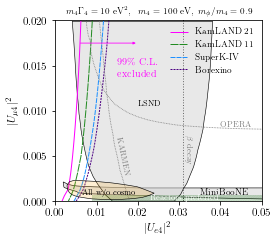

In [41]:
################################################################
# PLOTTING THE LIMITS
################################################################
fsize=11
rc('text', usetex=True)
rcparams={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
				'figure.figsize':(1*3.7,1.4*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
matplotlib.rcParams['hatch.linewidth'] = 0.1  # previous pdf hatch linewidth
rcParams.update(rcparams)
axes_form  = [0.185,0.15,0.775,0.76]
fig = plt.figure()
ax = fig.add_axes(axes_form)

############
# GET THE FIT REGIONS FROM DENTLER ET AL
DentlerPath='digitized/Dentler_et_al/0.9_100/'

SB_COLOR = 'lightgrey'
MB_ue_b,MB_umu_b = np.genfromtxt(DentlerPath+'bottom_MiniBooNE.dat',unpack=True)
MB_ue_t,MB_umu_t = np.genfromtxt(DentlerPath+'top_MiniBooNE.dat',unpack=True)
MB_ue_f=np.logspace( np.log10(np.min([MB_ue_b])), np.log10(np.max([MB_ue_b])), 100)
MB_umu_b_f = np.interp(MB_ue_f,MB_ue_b,MB_umu_b)
MB_umu_t_f = np.interp(MB_ue_f,MB_ue_t,MB_umu_t)
ax.fill_between(MB_ue_f,MB_umu_b_f,MB_umu_t_f,facecolor=SB_COLOR,alpha=0.5,lw=0)
ax.fill_between(MB_ue_f,MB_umu_b_f,MB_umu_t_f,edgecolor='black',facecolor='None',lw=0.6)

y,x = np.genfromtxt(DentlerPath+'right_LSND.dat',unpack=True)
yl,xl = np.genfromtxt(DentlerPath+'left_LSND.dat',unpack=True)
x_f=np.logspace( np.log10(np.min([xl])), np.log10(np.max([xl])), 100)
y_f = np.interp(x_f,x,y)
yl_f = np.interp(x_f,xl,yl)
ax.fill_betweenx(x_f,yl_f,y_f,facecolor=SB_COLOR,alpha=0.5,lw=0)
ax.fill_betweenx(x_f,y_f,yl_f,edgecolor='black',facecolor='None',lw=0.6)

x,y = np.genfromtxt(DentlerPath+'bottom_combined.dat',unpack=True)
xl,yl = np.genfromtxt(DentlerPath+'top_combined.dat',unpack=True)
x_f=np.logspace( np.log10(np.min([x])), np.log10(np.max([x])), 100)
y_f = np.interp(x_f,x,y)
yl_f = np.interp(x_f,xl,yl)
ax.fill_between(x_f,y_f,yl_f,facecolor='None',edgecolor='orange',
                hatch='/////////////////////////////////////////',alpha=0.7,lw=0,zorder=10)
ax.fill_between(x_f,y_f,yl_f,edgecolor='black',facecolor='None',lw=0.6,zorder=10)



X,Y = np.meshgrid(UE4SQR,UMU4SQR)
# ax.contourf(X,Y,LK, [chi2.ppf(0.90, dofK),1e100], colors=['black'],alpha=0.1, linewidths=[0.1])
# ax.contour(X,Y,L, 20, color='black')

# ax.contourf(X,Y,LB, [chi2.ppf(0.90, dofB),1e100], colors=['black'],alpha=0.1, linewidths=[0.1])

# Z = LB
# pcm = ax.pcolor(X, Y, Z,
#                    norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
#                    cmap='PuBu_r')# ax.contour(X,Y,L, 20, color='black')
# fig.colorbar(pcm, ax=ax, extend='max')

c2=ax.contour(X,Y,LS, [chi2.ppf(0.99, 2)], linestyles=['--'],colors=['dodgerblue'],linewidths=[1.0], ls='--',label=r'SuperK-IV')
c3=ax.contour(X,Y,LB, [chi2.ppf(0.99, 12)], linestyles=['--'],colors=['indigo'],linewidths=[1.0],label=r'Borexino')
c1=ax.contour(X,Y,LK, [chi2.ppf(0.99, 6)], linestyles=['--'],colors=['forestgreen'],linewidths=[1.0],label=r'KamLAND 11')
c4=ax.contour(X,Y,LK21, [chi2.ppf(0.99, 3)], linestyles=['-'],colors=['magenta'],linewidths=[1.0],label=r'KamLAND 21')
c2.collections[0].set_dashes([(0, (5.0, 1.0))])
c3.collections[0].set_dashes([(0, (2.0, 1.0))])
c1.collections[0].set_dashes([(0, (8.0, 1.0))])
h1,_ = c1.legend_elements()
h2,_ = c2.legend_elements()
h3,_ = c3.legend_elements()
h4,_ = c4.legend_elements()
ax.legend([h4[0], h1[0], h2[0],h3[0]], ['KamLAND 21', 'KamLAND 11', 'SuperK-IV','Borexino',],loc='upper right', frameon=False,fontsize=9)

# ax.clear()
# ax.set_xscale('log')
# ax.set_yscale('log')
##############
# STYLE
if params.model == const.VECTOR:
	boson_string = r'$m_{Z^\prime}$'
	boson_file = 'vector'
elif params.model == const.SCALAR:
	boson_string = r'$m_\phi$'
	boson_file = 'scalar'

ax.set_title(r'$m_4 \Gamma_4 = 10$ eV$^2$, \, $m_4 = %.0f$ eV,\, '%(100)+boson_string+r'$/m_4 = %.1f$'%(params.mBOSON/params.m4), fontsize=9)
ax.annotate(r'MiniBooNE',xy=(0.7,0.036),xycoords='axes fraction',color='black',fontsize=9,rotation=0)
ax.annotate(r'LSND',xy=(0.4,0.53),xycoords='axes fraction',color='black',fontsize=8,rotation=0)
ax.annotate(r'\noindent All w/o cosmo',xy=(0.13,0.04),xycoords='axes fraction',color='black',fontsize=8,rotation=0,zorder=10)


ax.fill_between(np.linspace(9e-3,0.1,100),0.7e-3*np.ones(100),-0.05e-3*np.ones(100),
                lw=0.0,fc='None',ec='darkgreen',
                hatch='//////////////////////////////////////',zorder=2)
ax.annotate(r'Reactors preferred',xy=(0.023,0.13e-3),
                xycoords='data',color='white',fontsize=7.5,rotation=0)


x,y = np.genfromtxt(DentlerPath+'KARMEN.dat',unpack=True)
ax.plot(x,y,lw=0.8,color='gray',dashes=(1,1))
x,y = np.genfromtxt(DentlerPath+'OPERA.dat',unpack=True)
ax.plot(x,y,lw=0.8,color='gray',dashes=(1,1))
ax.vlines(0.031,-1,1,lw=1.0, ls=':',color='black',zorder=-1)
ax.annotate(r'OPERA',xy=(0.04,0.0083), 
            xycoords='data',color='grey',fontsize=8,rotation=0)
ax.annotate(r'KARMEN',xy=(0.0145,0.0030), 
            xycoords='data',color='grey',fontsize=8,rotation=-78)
ax.annotate(r'$\beta$ decay',xy=(0.0315,0.0043), 
            xycoords='data',color='grey',fontsize=8,rotation=-90)
ax.annotate(r'\noindent 99\% C.L. \\\noindent excluded', 
            fontsize=0.9*fsize, xy=(1.2,0.2), xytext=(0.3,0.75),xycoords='axes fraction', color='magenta')

ax.annotate(r'', fontsize=fsize, xy=(0.02,0.0175), xytext=(0.0056,0.0175), xycoords='data' ,zorder=1000, color='magenta',
arrowprops=dict(arrowstyle="-|>", mutation_scale=5, color='magenta', lw = 0.8))


ax.set_xlim(0,0.05)
ax.set_ylim(0,0.02)
ax.set_yticks([0,0.005,0.01,0.015,0.02])
ax.set_xlabel(r'$|U_{e 4}|^2$')
ax.set_ylabel(r'$|U_{\mu 4}|^2$')
fig.savefig('plots/limits_MN_%.0f_MB_%.0f_v2.pdf'%(params.m4*1e9,params.mBOSON*1e9),rasterized=True)
fig.show()